# Using APIs and JSON Data

In [ ]:
import json
import pandas as pd
import requests

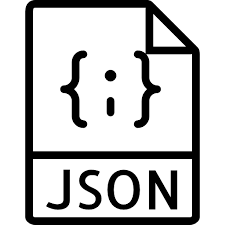

## Agenda

Students will be able to:

* Recognize JSON files and interact with them using the `json` library;
* Retrieve data from APIs using the `requests` library;
* Parse API responses.

## What is a JSON file?

JSON stands for Java Script Object Notation. 

JSON objects are one way that data is transmitted over the web.  It is notable for being lightweight, which makes it [preferred](https://stackoverflow.com/questions/383692/what-is-json-and-why-would-i-use-it), generally, over XML.

Let's check out this [link](https://www.json.org/json-en.html) to the JSON website.

## Format

JSON objects look similar to Python dictionaries, and you will see that they can be interacted with in a similar way.  They are both objects that contain information within open and closed curly braces.  JSON's look much like nested dictionaries.

## Loading the JSON file

The new_releases.json file resulted from a query to the Spotify API. It represents 20 recent releases. The plan is to ping the API each day for new releases, and build a playlist that rotates through the songs off each album. 

Let's begin by importing the json package, opening a file with python's built in function, and then loading that data in.

In [ ]:
with open('data/new_releases.json') as f:
    data = json.load(f)

The Spotify API returned the data in the form of JSON object, which the json module transforms into a Python object.

## Exploring JSON Schemas  

Recall that JSON files have a nested structure. The most granular level of raw data will be individual numbers (float/int) and strings. These in turn will be stored in the equivalent of Python lists and dictionaries. Because these can be combined, we'll start exploring by checking the type of our root object, and start mapping out the hierarchy of the json file.

In [ ]:
type(data)

In [ ]:
data.keys()

In this case, there is only a single key, 'albums', so we'll continue on down the pathway exploring and mapping out the hierarchy. Once again, let's start by checking the type of this nested data structure.

In [ ]:
type(data['albums'])

In [ ]:
data['albums'].keys()

At this point, things are starting to look something like this: 

![](images/json_diagram1.JPG)

At this point, if we were to continue checking individual data types, we have a lot to go through. To simplify this, let's use a for loop:

In [ ]:
for key, value in data['albums'].items():
    print(key, type(value))

Adding this to our diagram we now have something like this:
![](images/json_diagram2.JPG)


Let's look at the type of items:

In [ ]:
type(data['albums']['items'])

In [ ]:
data['albums']['items']

We access the values as we would a list, as it has now been converted into one:

In [ ]:
data['albums']['items'][0]['artists'][0]['name']

In [ ]:
data['albums']['items'][1]['artists'][0]['name']

Because the JSON object is a dicitonary, we can create a dataframe from it, like we have learned previously:

## Moving into a `pandas` DataFrame

In [ ]:
df = pd.DataFrame(data['albums']['items'])
df.head()

What do you notice about the values in this dataframe?

In [ ]:
df['artists'] = [item[0]['name'] for item in df['artists']]

In [ ]:
df.head()

## APIs

The term **Application Program Interfaces**, or APIs, is exceedingly general. It applies to any interaction between applications or between an application and a user. One might speak of the "matplotlib API" to describe proper plotting syntax but also of APIs that govern the interaction between various steps of a data pipeline: between a database server and a remote client, between a local machine and a cloud storage bucket, etc.

APIs are commonly used to retrieve data from remote websites. Sites like Reddit, Twitter, and Facebook all offer certain data through their APIs. 

To use an API, you make a request to a remote web server, and retrieve the data you need.

We'll use the `requests` library to access web locations.

![](images/logo.png)

Below is how you would install and import the requests library before making any requests. 
```python
# Uncomment and install requests if you dont have it already
# conda install -c anaconda requests

# Import requests to working environment
import requests
```

## The `.get()` Method

Now that we have requests library ready in our working environment, we can start making some requests using the `.get()` method as shown below:


We can use a simple GET request to retrieve information from the OpenNotify API.




OpenNotify has several API **endpoints**. An endpoint is a server route that is used to retrieve different data from the API. For example, the /comments endpoint on the Reddit API might retrieve information about comments, whereas the /users endpoint might retrieve data about users. To access them, you would add the endpoint to the base url of the API.



In [ ]:
# Make a get request to get the latest position of the
# international space station from the opennotify api.

url = 'http://api.open-notify.org/iss-now.json'
response = requests.get(url)

In [ ]:
response.status_code

In [ ]:
response.content

In [ ]:
# Let's check out who is in space right now!

url = 'http://api.open-notify.org/astros.json'
response = requests.get(url)
print(response.status_code)
data = response.json()
data.keys()

In [ ]:
people = data['people']
people

How can I use `people` to get the astronauts' names in a list?

<details>
    <summary>
        Answer here
    </summary>
    [person['name'] for person in people]
</details>

In [ ]:
print(f"There are {data['number']} people in the space station right now!")
print(f"Their names are {', '.join([person['name'] for person in people])}.")

GET is by far the most used HTTP method. We can use GET request to retrieve data from any destination. 
GET is by far the most used HTTP method. We can use GET request to retrieve data from any destination. 

## Status Codes
The request we make may not always be successful. The best way is to check the status code which gets returned with the response. Here is how you would do this. 

In [ ]:
response.raise_for_status()

[Status Code Info](https://developer.mozilla.org/en-US/docs/Web/HTTP/Status) <br/>
[Status Code Info with Dogs](https://httpstatusdogs.com/) <br/>
[Wikipedia on Status Codes](https://en.wikipedia.org/wiki/List_of_HTTP_status_codes)

So this is a good check to see if our request was successful. Depending on the status of the web server, the access rights of the clients and availibility of requested information. A web server may return a number of status codes within the response. Wikipedia has an exhaustive details on all these codes.

### Common status codes

* 200 — everything went okay, and the result has been returned (if any)
* 301 — the server is redirecting you to a different endpoint. This can happen when a company switches domain names, or an endpoint name is changed.
* 401 — the server thinks you’re not authenticated. This happens when you don’t send the right credentials to access an API.
* 400 — the server thinks you made a bad request. This can happen when you don’t send along the right data, among other things.
* 403 — the resource you’re trying to access is forbidden — you don’t have the right permissions to see it.
* 404 — the resource you tried to access wasn’t found on the server.

### Hitting the right endpoint

We’ll now make a GET request to http://api.open-notify.org/iss-pass.json.

In [ ]:
url = 'http://api.open-notify.org/iss-pass.json'
response = requests.get(url)
response.status_code


## Response Contents
We can check the returned information using `.text` property of the response object. 
```python
print (resp.text)
```

In [ ]:
response = requests.get("http://api.open-notify.org/iss-pass.json")

In [ ]:
# In this case, the text gives us a failure message and a reason

response.text

### Query parameters

If you look at the documentation for the OpenNotify API, we see that the ISS Pass endpoint requires two parameters.

We can do this by adding an optional keyword argument, params, to our request. In this case, there are two parameters we need to pass:

* lat — The latitude of the location we want.
* lon — The longitude of the location we want.
We can make a dictionary with these parameters, and then pass them into the requests.get function.

We’ll make a request using the coordinates of New York City, and see what response we get.

We can also do the same thing directly by adding the query parameters to the url, like this: http://api.open-notify.org/iss-pass.json?lat=47.6&lon=-122.3.

It’s almost always preferable to setup the parameters as a dictionary, because requests takes care of some things that come up, like properly formatting the query parameters.

We can add parameters to the get method in the form of a dictionary.  In this instance, the dictionary parameter has two keys, lat and long.
Help me code out the correct request.

In [ ]:
# Our code here

response = requests.get("http://api.open-notify.org/iss-pass.json",
            params={'lat': 47.6, 'lon': -122.3})

# Print the content of the response (the data the server returned)

print(response.text)

# This gets the same data as the command aboveresponse:
# requests.get("http://api.open-notify.org/iss-pass.json?lat=40.71&lon=-74")

## Secure APIs: Generating Access Tokens

In order to use many APIs, one needs to use OAuth or other security measures that require access tokens or keys. As such, our first step will be to generate this login information so that we can start making some requests.  

With that, lets go grab an access token from an API site and make some API calls! Point your browser over to this [yelp page](https://www.yelp.com/developers/v3/manage_app) and start creating an app in order to obtain an api access token:


![](./images/yelp_app.png)

You can either sign in to an existing Yelp account, or create a new one, if needed.

On the page you see above, simply fill out some sample information such as "Flatiron Edu API Example" for the app name, or whatever floats your boat. Afterwards, you should be presented with an API key that you can use to make requests!

With that, it's time to start making some api calls!

## An Example Request with OAuth <a id="oauth_request"></a>
https://www.yelp.com/developers/documentation/v3/get_started

Let's look at an example request and dissect it into its consituent parts:

In [ ]:
with open('.secrets/creds.json') as f:
    creds = json.load(f)

url = 'https://api.yelp.com/v3/businesses/search'
term = 'Hamburgers'
SEARCH_LIMIT = 10
headers = {
    'Authorization': 'Bearer ' + creds['key']
}

url_params = {
    'term': term,
    'location': 'Seattle+WA',
    'limit': SEARCH_LIMIT,
    'offset': 0
}
response = requests.get(url, headers=headers, params=url_params)
print(response)
data = response.json()
data.keys()

## Breaking Down the Request

As you can see, there are three main parts to our request.  
  
They are:
* The url
* The header
* The parameters
  
The url is fairly straightforward and is simply the base url as described in the documentation.

The header is a dictionary of key-value pairs. In this case, we are using a fairly standard header used by many APIs. It has a strict form where 'Authorization' is the key and 'Bearer YourApiKey' is the value.

The parameters are the filters which we wish to pass into the query. These will be embedded into the url when the request is made to the api. Similar to the header, they form key-value pairs. Valid key parameters by which to structure your queries, are described in the API documentation which we'll look at further shortly. A final important note however, is the need to replace spaces with "+". This is standard to many requests as URLs cannot contain spaces. (Note that the header itself isn't directly embedded into the url itself and as such, the space between 'Bearer' and YourApiKey is valid.)


## The Response

As before, our response object has both a status code, as well as the data itself. With that, let's start with a little data exploration!

In [ ]:
data['businesses']

In [ ]:
data['businesses'][0]

In [ ]:
df = pd.DataFrame(data['businesses'])

df.head()

In [ ]:
lat = [float(business['coordinates']['latitude']) for business in yelp_data['businesses']]
long = [float(business['coordinates']['longitude']) for  business in yelp_data['businesses']]
df['lat'] = lat
df['long'] = long

In [ ]:
df.head()